In [1]:
%reload_ext autoreload
%autoreload 2
# check data path
import os, sys
path=os.path.abspath(os.getcwd())
sys.path.append('../driver')
sys.path.append('../../driver')
sys.path.append('../../../messungen')

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# import fmr_eva as fmr_eva
# import fmr_eva2 as fmr_eva2
# import fmr_read as fmr_read
# import fmr_read2 as fmr_read2

import FMR_Reader_v210208 as FMR_Reader
import FMR_Evaluator_v210331 as FMR_eva
import corporate_design_colors_v3 as cpd

style='../driver/thesis_half'
plt.style.use('%s.mplstyle'%style)

no style found


In [2]:
dataset_pa='BF CPW8 100mK lowbw'
dataset_wopa='BF CPW8 100mK lowbw wopa'
d_pa=FMR_Reader.read(dataset_pa, loc='../../../messungen/')
d_wopa=FMR_Reader.read(dataset_wopa, loc='../../../messungen/')

100%|██████████| 2601/2601 [01:11<00:00, 36.61it/s]


with temped and boxxed preamplifier (25°C)


100%|██████████| 2601/2601 [02:46<00:00, 15.61it/s]


without preamplifier


In [3]:
d_wopa,d_pa

({'version': 'version from 20210422',
  'T_RT(H)': array([21.86113559, 22.0492069 , 21.78667797, ..., 21.37127586,
         21.39342373, 21.34056897]),
  'T_sample(H)': array([       nan,        nan,        nan, ..., 0.09141203, 0.08512443,
         0.0809682 ]),
  'comment': 'without preamplifier',
  'f': array([ 2.  ,  2.02,  2.04, ..., 39.96, 39.98, 40.  ]),
  'H': array([-0.1   , -0.0995, -0.0989, ...,  1.199 ,  1.1995,  1.2   ]),
  'S21': array([[-3.00546698e-01+1.64040344e-01j, -3.00547088e-01+1.64022460e-01j,
          -3.00533157e-01+1.63993905e-01j, ...,
          -3.00548805e-01+1.63725702e-01j, -3.00547411e-01+1.63787188e-01j,
          -3.00473556e-01+1.63790405e-01j],
         [-9.35628924e-03-3.38584763e-01j, -9.34322270e-03-3.38576760e-01j,
          -9.32896779e-03-3.38558747e-01j, ...,
          -9.10860886e-03-3.38466771e-01j, -9.15899367e-03-3.38488678e-01j,
          -9.19782729e-03-3.38422820e-01j],
         [ 3.06666379e-01+1.46325623e-01j,  3.06647444e-01+1.46337

In [4]:
Hmin=0
Hmax=1.15
fmin=4
fmax=40
NH=551
Nf=901
db_wopa=FMR_eva.complex_binning(d_wopa, Hmin=Hmin, Hmax=Hmax, fmin=fmin, fmax=fmax, NH=NH, Nf=Nf)
db_pa=FMR_eva.complex_binning(d_pa, Hmin=Hmin, Hmax=Hmax, fmin=fmin, fmax=fmax, NH=NH, Nf=Nf)

In [5]:
Hnorm=[1.1]
dn_wopa=FMR_eva.normS21(db_wopa, Hnorm=Hnorm)
dn_pa=FMR_eva.normS21(db_pa, Hnorm=Hnorm)
#dn_bf_up,dn_bf_down,dn_fh_up,dn_fh_down

<Figure size 3600x2160 with 0 Axes>

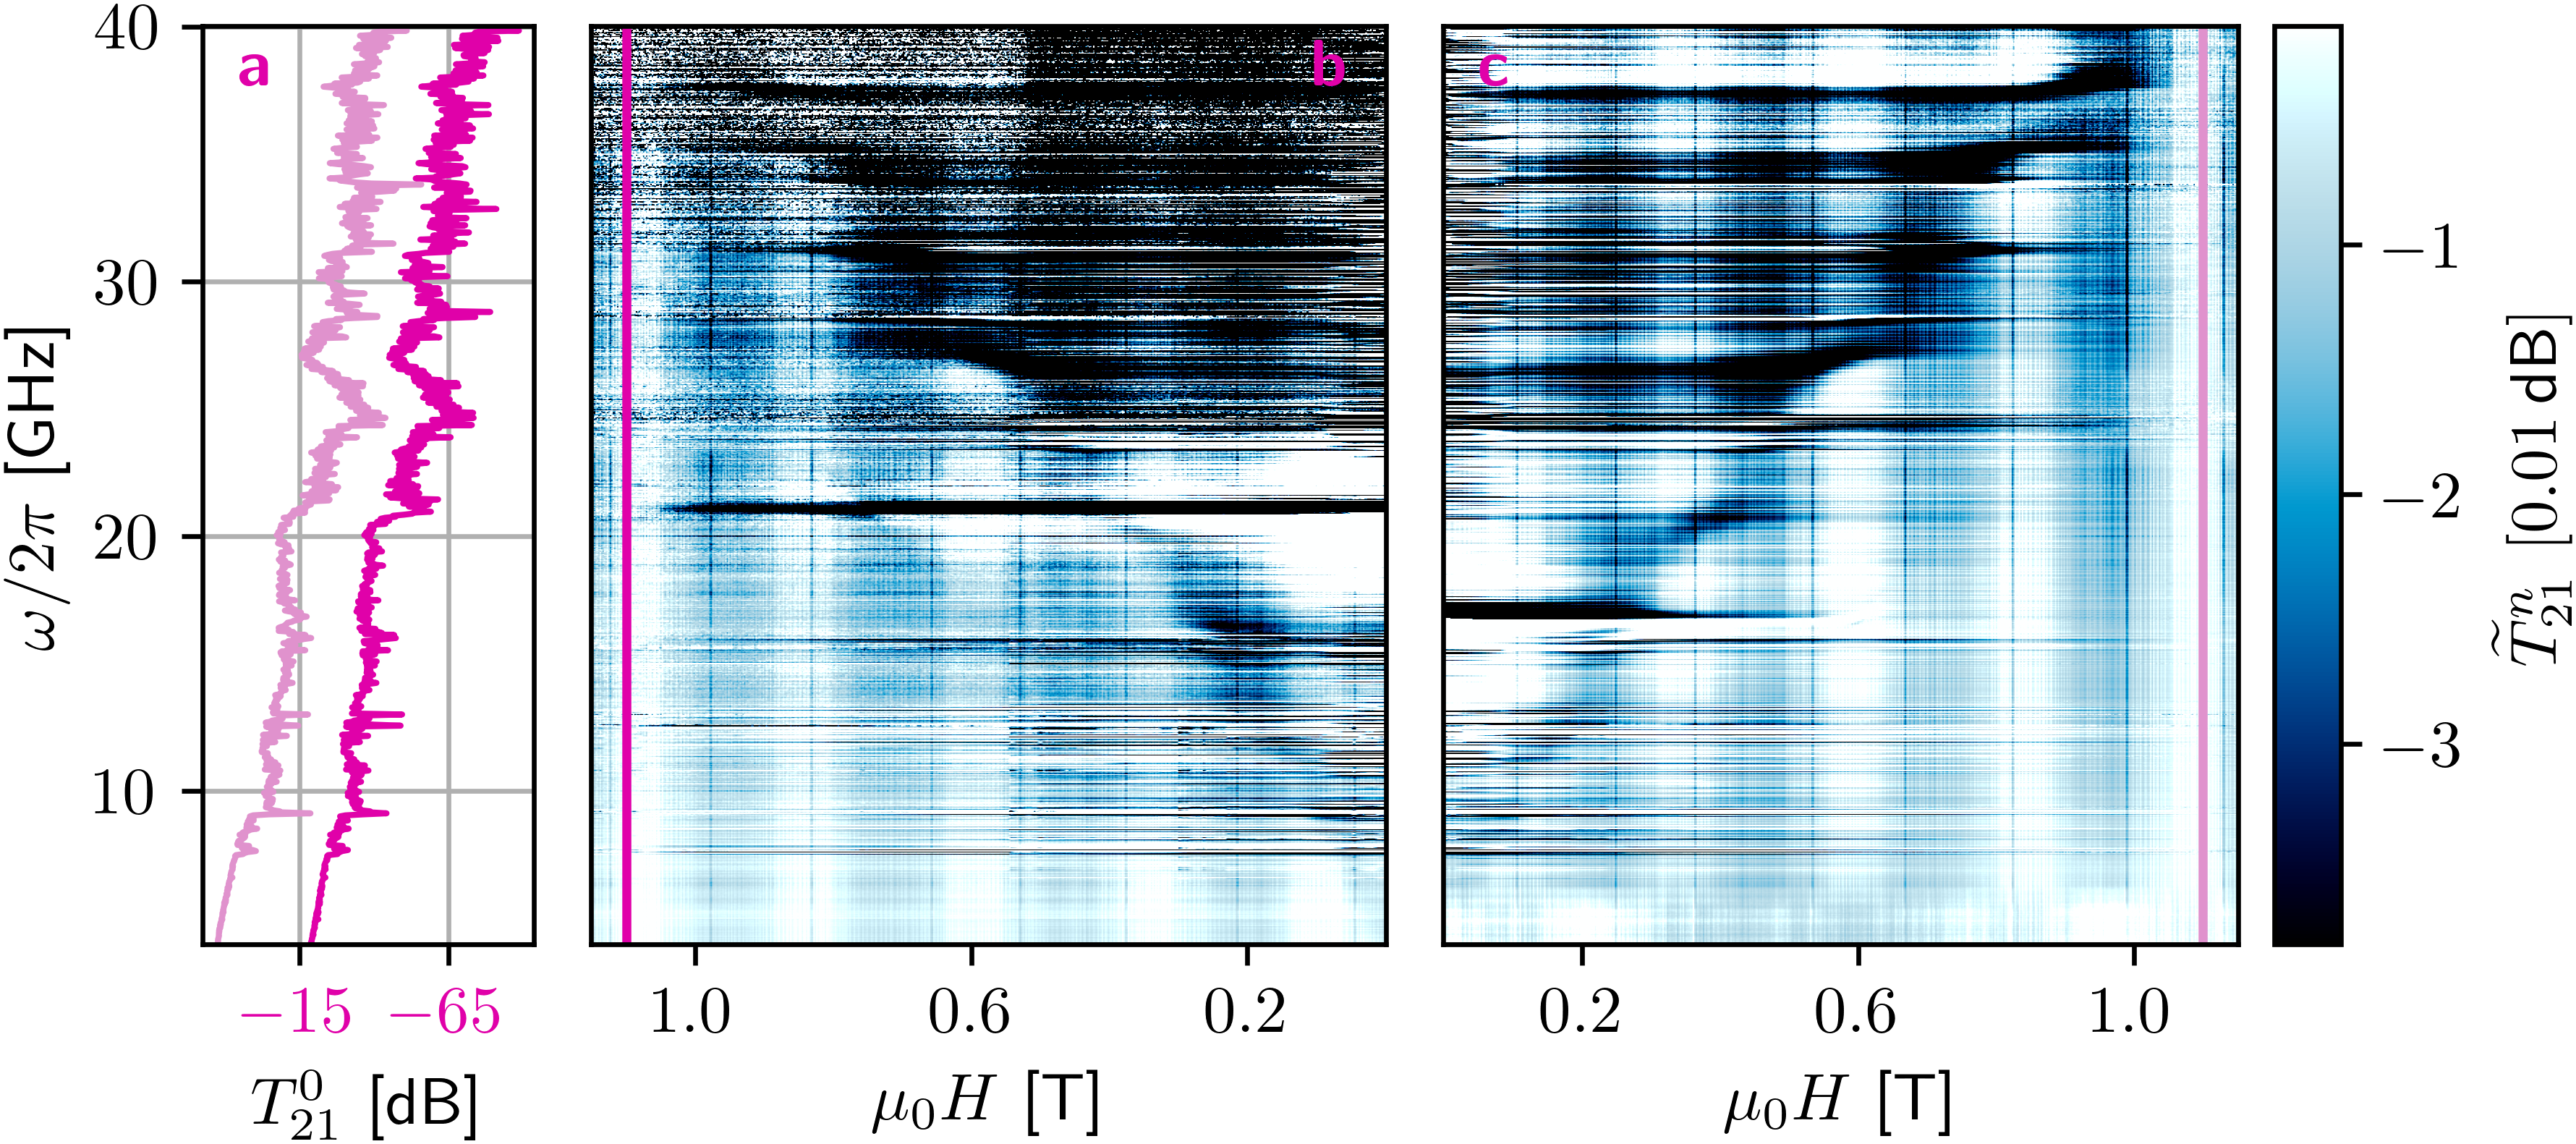

In [12]:

style='../driver/thesis_half'
plt.style.use('%s.mplstyle'%style)

img0=np.flip(20*np.log10(np.abs(dn_wopa['S21']))*100,axis=1)
norm0=20*np.log10(np.abs(dn_wopa['S21norm']))
posN0=dn_wopa['Hnorm']
H0=dn_wopa['H']
freq0=dn_wopa['f']

img1=20*np.log10(np.abs(dn_pa['S21']))*100
norm1=20*np.log10(np.abs(dn_pa['S21norm']))
posN1=dn_pa['Hnorm']
H1=dn_pa['H']
freq1=dn_pa['f']

Hlim=(-1.5,1.5)
flim=(0,40)
contrast=.15
fig_nr=0

xlabel='$\mu_0H$ [T]'
ylabel='$\omega/2\pi$ [GHz]'
nlabel='$T_{21}^0$ [dB]'
clabel='$T^n_{21}\ [0.01\,$dB$]$'
normticks=[0,-40]
filename=False
subpath=False
    
# correct image framing
stepsizeH0=np.abs(H0[0]-H0[1])/2
stepsizef0=np.abs(freq0[-1]-freq0[-2])/2
Hind0=[np.abs(H0-Hlim[0]).argmin(),
      np.abs(H0-Hlim[1]).argmin()+1]
find0=[np.abs(freq0-flim[0]).argmin(),
      np.abs(freq0-flim[1]).argmin()+1]
img0=img0[find0[0]:find0[1],
        Hind0[0]:Hind0[1]]
ext0=[H0[Hind0[1]-1]+stepsizeH0,
      H0[Hind0[0]]-stepsizeH0,
     freq0[find0[0]]-stepsizef0,
     freq0[find0[1]-1]+stepsizef0]
freq0=freq0[find0[0]:find0[1]]
H0=H0[Hind0[0]:Hind0[1]]

stepsizeH1=np.abs(H1[0]-H1[1])/2
stepsizef1=np.abs(freq1[-1]-freq1[-2])/2
Hind1=[np.abs(H1-Hlim[0]).argmin(),
      np.abs(H1-Hlim[1]).argmin()+1]
find1=[np.abs(freq1-flim[0]).argmin(),
      np.abs(freq1-flim[1]).argmin()+1]
img1=img1[find1[0]:find1[1],
        Hind1[0]:Hind1[1]]
ext1=[H1[Hind1[0]]-stepsizeH1,
     H1[Hind1[1]-1]+stepsizeH1,
     freq1[find1[0]]-stepsizef1,
     freq1[find1[1]-1]+stepsizef1]
freq1=freq1[find1[0]:find1[1]]
H1=H1[Hind1[0]:Hind1[1]]

img0[img0==-np.inf]=np.nan
img0[img0==np.inf]=np.nan
clim0=(np.nanmean(img0)-contrast*np.nanstd(img0),
      np.nanmean(img0)+contrast*np.nanstd(img0))
img1[img1==-np.inf]=np.nan
img1[img1==np.inf]=np.nan
img=np.concatenate((img0,img1))
clim=(np.nanmean(img)-contrast*np.nanstd(img),
      np.nanmean(img)+contrast*np.nanstd(img))

plt.close(fig_nr)
fig=plt.figure(fig_nr)

fig, (ax_norm, ax_img0, ax_img1, ax_clb) = plt.subplots(ncols=4,figsize=(6,2.7),
                                    gridspec_kw={"width_ratios":[1,2.4,2.4,.2]},
                                    constrained_layout=True)        

norm0=norm0[find0[0]:find0[1]]
ax_norm.plot(norm0,freq0,c=cpd.curves(color='magenta')(1))   
ax_norm.plot(norm1,freq1,c=cpd.curves(color='magenta')(.65)) 
ax_norm.set_ylabel(ylabel)
ax_norm.set_xlabel(nlabel)
ax_norm.set_ylim(ext0[2],ext0[3])
ax_norm.grid()
ax_norm.invert_xaxis()
ax_norm.tick_params(axis='x', labelcolor=cpd.curves(color='magenta')(1))

norm=np.concatenate((norm0,norm1))
nlim0=[np.min(norm),np.max(norm)]
enn0=np.abs(nlim0[1]-nlim0[0])/4
nlim0=np.around(([(nlim0[0]+enn0)*2,(nlim0[1]-enn0)*2]),decimals=-1)/2
ax_norm.set_xticks(nlim0)

# Take care of image and colorbar   
ax_img0.set_yticks([])
ax_img0.set_yticklabels([])
im0 = ax_img0.imshow(img0, 
                   extent=ext0, 
                   aspect='auto',
                   origin='lower',
                   clim=clim,
                   cmap=cpd.images())
ax_img0.set_xlabel(xlabel)
ax_img0.vlines(posN0, ymin=ext0[2], ymax=ext0[3], lw=1.5,
             color=cpd.curves(color='magenta')(1),
             label="$H_n=%3.2f\,$T"%float(posN0))

ax_img1.set_yticks([])
ax_img1.set_yticklabels([])
im1 = ax_img1.imshow(img1, 
                   extent=ext1, 
                   aspect='auto',
                   origin='lower',
                   clim=clim,
                   cmap=cpd.images())
ax_img1.set_xlabel(xlabel)
ax_img1.vlines(posN1, ymin=ext1[2], ymax=ext1[3], lw=1.5,
             color=cpd.curves(color='magenta')(.65),
             label="$H_n=%3.2f\,$T"%float(posN1))

ax_img0.set_xlim(ext0[0],ext0[1])
ax_img0.set_ylim(ext0[2],ext0[3])

ax_img0.set_xticks([.2,.6,1])
ax_img1.set_xticks([.2,.6,1])

cbar=fig.colorbar(im0,label=clabel, cax=ax_clb)

ax_norm.annotate(r'\textbf{a}',xy=(0, 1), xycoords='axes fraction',xytext=(50, -100),color=cpd.curves(color='magenta')(1),
                  textcoords='offset pixels',horizontalalignment='left',verticalalignment='bottom')
ax_img0.annotate(r'\textbf{b}',xy=(1, 1), xycoords='axes fraction',xytext=(-100, -100),color=cpd.curves(color='magenta')(1),
                  textcoords='offset pixels',horizontalalignment='left',verticalalignment='bottom')
ax_img1.annotate(r'\textbf{c}',xy=(0, 1), xycoords='axes fraction',xytext=(50, -100),color=cpd.curves(color='magenta')(1),
                  textcoords='offset pixels',horizontalalignment='left',verticalalignment='bottom')

fig.savefig('lowbw_comp.pgf')

In [7]:
d_wopa

{'version': 'version from 20210422',
 'T_RT(H)': array([21.86113559, 22.0492069 , 21.78667797, ..., 21.37127586,
        21.39342373, 21.34056897]),
 'T_sample(H)': array([       nan,        nan,        nan, ..., 0.09141203, 0.08512443,
        0.0809682 ]),
 'comment': 'without preamplifier',
 'f': array([ 2.  ,  2.02,  2.04, ..., 39.96, 39.98, 40.  ]),
 'H': array([-0.1   , -0.0995, -0.0989, ...,  1.199 ,  1.1995,  1.2   ]),
 'S21': array([[-3.00546698e-01+1.64040344e-01j, -3.00547088e-01+1.64022460e-01j,
         -3.00533157e-01+1.63993905e-01j, ...,
         -3.00548805e-01+1.63725702e-01j, -3.00547411e-01+1.63787188e-01j,
         -3.00473556e-01+1.63790405e-01j],
        [-9.35628924e-03-3.38584763e-01j, -9.34322270e-03-3.38576760e-01j,
         -9.32896779e-03-3.38558747e-01j, ...,
         -9.10860886e-03-3.38466771e-01j, -9.15899367e-03-3.38488678e-01j,
         -9.19782729e-03-3.38422820e-01j],
        [ 3.06666379e-01+1.46325623e-01j,  3.06647444e-01+1.46337651e-01j,
       

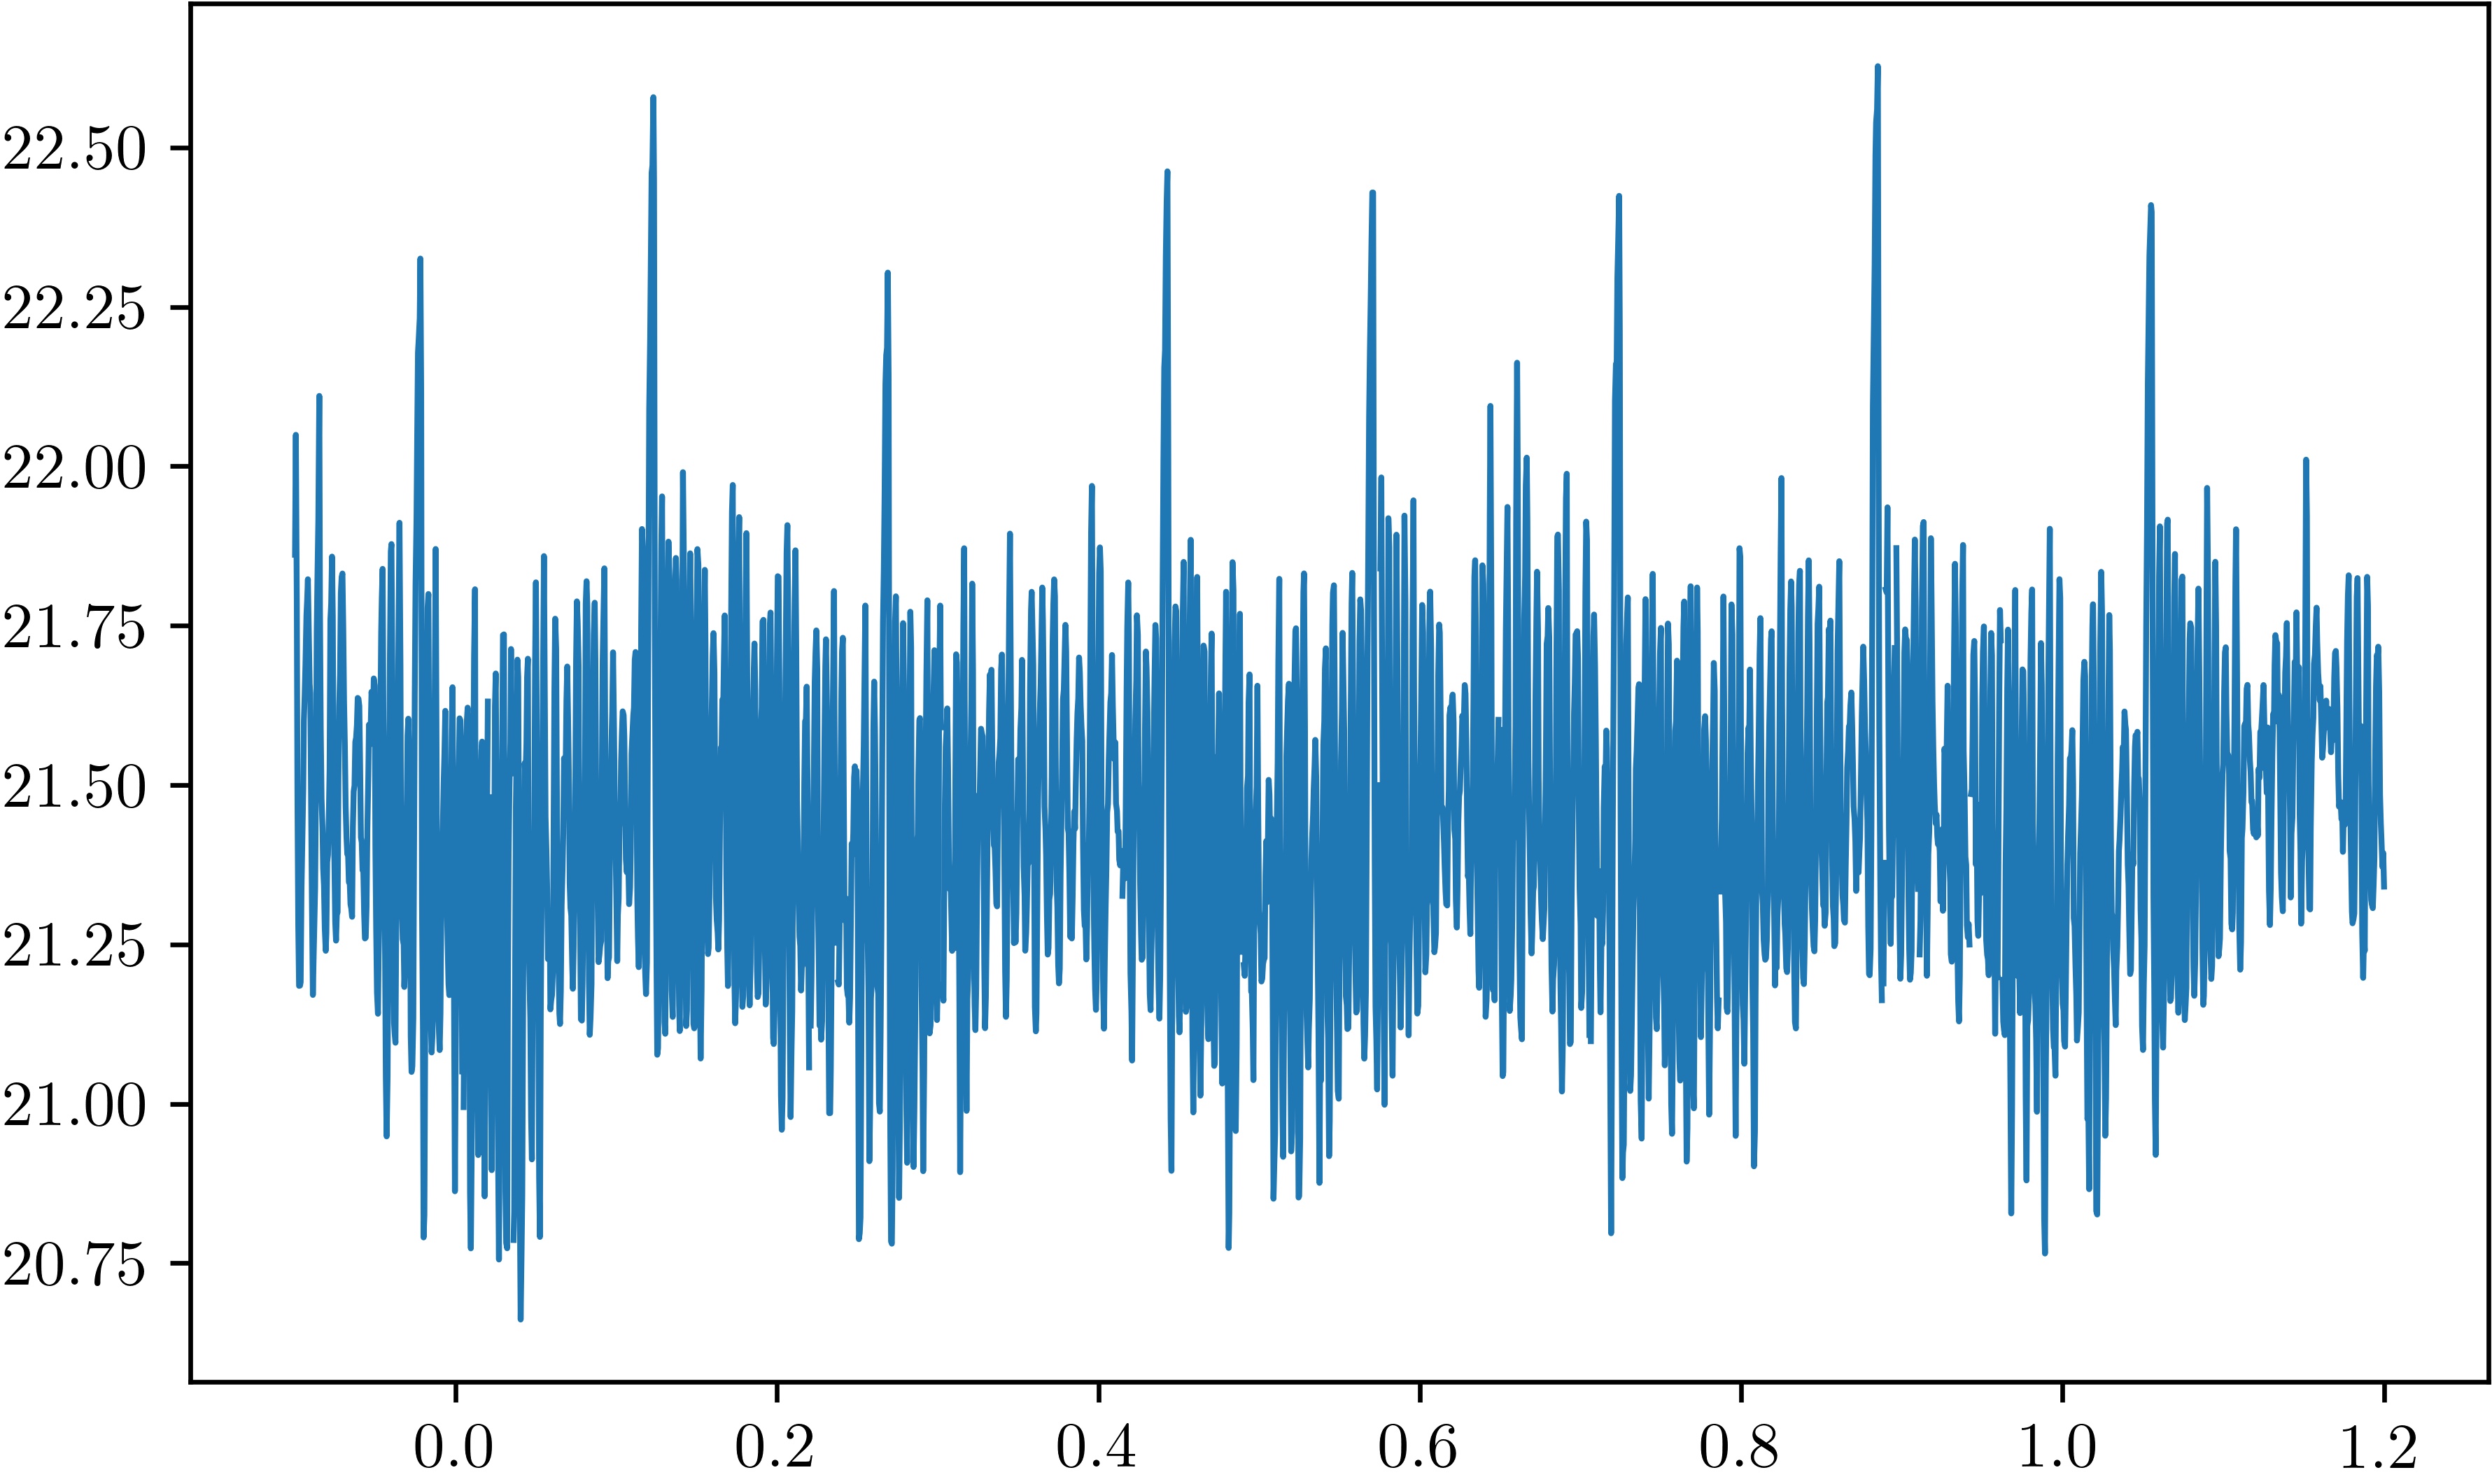

In [8]:
plt.plot(d_wopa['H'],d_wopa['T_RT(H)'])

In [14]:
def binning(d, 
           fmin=False,
           fmax=False,
           Hmin=False,
           Hmax=False,
           Nf=False,
           NH=False):
    
    # Get Binning extent
    if Hmin is False:
        Hmin=np.nanmin(d['H'])
    if Hmax is False:
        Hmax=np.nanmax(d['H'])
    if fmin is False:
        fmin=np.nanmin(d['f'])
    if fmax is False:
        fmax=np.nanmax(d['f'])
    ext=[[Hmin,Hmax], [fmin,fmax]]
        
    # Get Binning resolution
    checkH=np.argmin(np.abs(d['H']-Hmax))-np.argmin(np.abs(d['H']-Hmin))+1
    if NH is False:NH=checkH
    elif NH>checkH:print('Error: Oversampling in H-direction!')
        
    checkf=np.argmin(np.abs(d['f']-fmax))-np.argmin(np.abs(d['f']-fmin))+1
    if Nf is False:Nf=checkf
    elif Nf>checkf:print('Error: Oversampling in f-direction!')
    res=[NH,Nf]
    
    # Get 2D grids
    abso=d['T21']
    HH, ff =np.meshgrid(d['H'],d['f'])
    
    # from 2D grids, to 1D rows
    X, Y = np.ravel(HH), np.ravel(ff)
    Zabso = np.ravel(abso)
    
    # Bin that stuff
    abso_SUM, x,y = np.histogram2d(X,Y,
                                   bins=res, 
                                   range=ext, 
                                   normed=False, 
                                   weights=Zabso)
    counter, x,y = np.histogram2d(X,Y,
                                  bins=res, 
                                  range=ext, 
                                  normed=False, 
                                  weights=None)
    
    # get that binned stuff back together.
    db={'ext(H,f)':[Hmin,Hmax,fmin,fmax],
        'res(H,f)':[NH,Nf]}
    db['T21']=abso_SUM.T/counter.T
    db['f']=np.linspace(fmin,fmax,Nf)
    db['H']=np.linspace(Hmin,Hmax,NH)
    return db

In [21]:
def normT21(db,Hnorm='max'):
    '''
    db: H,f,S21
    Hnorm: 'max', 'min', 'ext', [-1,1]
    
    return
    dn: H, Hnorm, S21, S21norm, f
    '''
    
    H=db['H']
    abso=db['T21']
    
    # get Positions
    if Hnorm=='max':
        pos=[np.argmin(np.abs(H-np.nanmax(H)))]
    elif Hnorm=='min':
        pos=[np.argmin(np.abs(H-np.nanmin(H)))]
    elif Hnorm=='ext':
        pos=[np.argmin(np.abs(H-np.nanmax(H))),
             np.argmin(np.abs(H-np.nanmin(H)))]
    else:
        pos= [0 for x in range(len(Hnorm))]
        for i,h in enumerate(Hnorm):
            pos[i]=np.argmin(np.abs(H-h))
    
    
    
    # get Normalization
    lenpos=len(pos)
    Habso=0
    Hnorm=[]
    for p in pos:
        Habso=Habso+abso[:,p]/lenpos
        Hnorm.append(H[pos])
        
    # gridden
    X = np.ones((len(H)))
    ones, HHabso   = np.meshgrid(X,Habso)
    
    # Normen
    HHT21=HHabso
    norm=1/np.abs(HHT21)
    abso=abso*norm
    
    # Build normated Dataset
    dn={}
    dn['H']=H
    dn['Hnorm']=np.array(Hnorm)
    dn['T21']=abso
    dn['T21norm']=Habso
    dn['f']=db['f']
    
    return dn